In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

In [3]:
df=pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [6]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [7]:
df.shape

(101, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [9]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
df.isnull()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [12]:
df.isnull().sum().sum()

0

(array([81.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 20.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

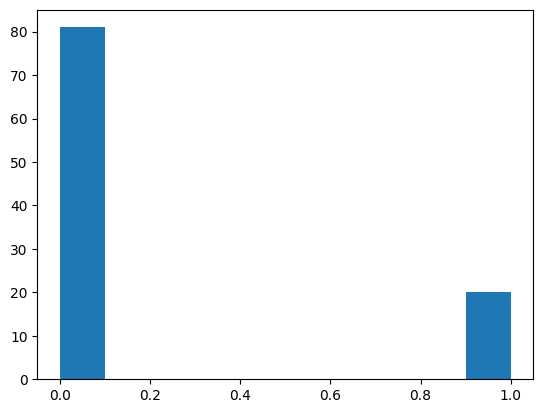

In [13]:
import matplotlib.pyplot as plt
plt.hist(df['feathers'])

(array([[ 10.,  10.,  11.,  10.,  10.,  10.,  10.,  10.,  10.,  10.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [101.,   0.,

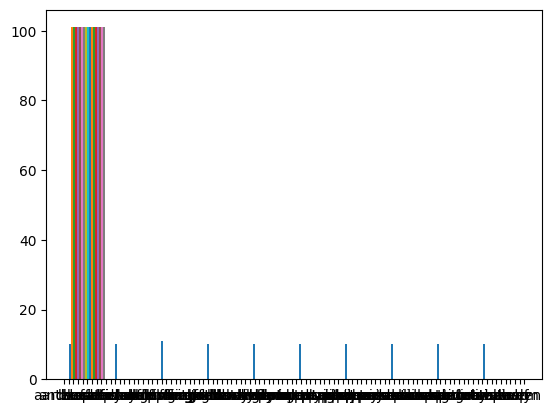

In [14]:
plt.hist(df)

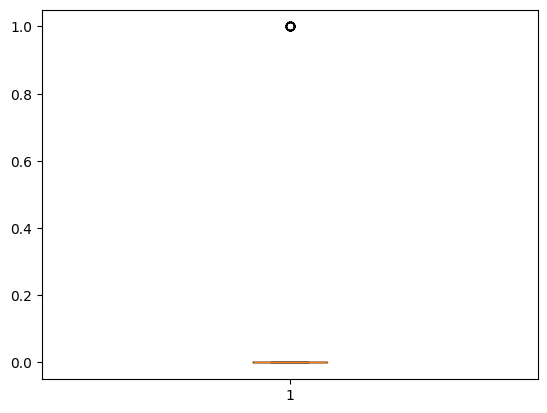

In [15]:
plt.boxplot(df['feathers'])
plt.show()

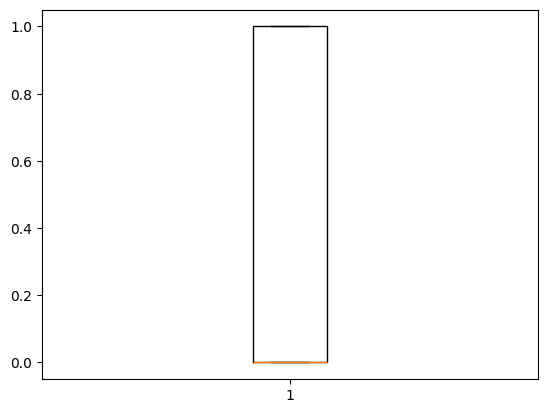

In [16]:
plt.boxplot(df['aquatic'])
plt.show()

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, :-1].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [19]:
X_train

array([['tuatara', 0, 0, ..., 1, 0, 0],
       ['rhea', 0, 1, ..., 1, 0, 1],
       ['octopus', 0, 0, ..., 0, 0, 1],
       ...,
       ['polecat', 1, 0, ..., 1, 0, 1],
       ['crayfish', 0, 0, ..., 0, 0, 0],
       ['cavy', 1, 0, ..., 0, 1, 0]], dtype=object)

In [20]:
len(X_test)

21

In [21]:
knn=KNeighborsClassifier(n_neighbors=12)

In [22]:
df.shape

(101, 18)

In [23]:
np.sqrt(101)

10.04987562112089

In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

df = df.drop(columns=["antelope"], errors='ignore')


X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (80, 116)
Testing set size: (21, 116)


In [25]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=12)

In [26]:
knn.predict(X)

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 4, 5, 6, 2, 1, 4, 4, 2, 2,
       1, 2, 6, 1, 1, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 6, 1, 1, 1, 1, 6, 1, 6, 1, 1, 2, 2, 2, 2, 4, 4, 4, 1, 1, 1,
       4, 1, 1, 1, 1, 2, 6, 4, 4, 1, 4, 4, 2, 2, 4, 4, 4, 2, 1, 5, 4, 2,
       6, 1, 1, 1, 4, 1, 1, 2, 1, 6, 1, 4, 2], dtype=int64)

In [27]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [28]:
type(y)

pandas.core.series.Series

In [29]:
#convert series into array

In [30]:
y.values

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [31]:
y_pred = knn.predict(X)

In [32]:
y_predict = pd.DataFrame(data=[y_pred,y.values])

In [33]:
y_predict

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1,1,4,1,1,1,1,4,4,1,...,1,4,1,1,2,1,6,1,4,2
1,1,1,4,1,1,1,1,4,4,1,...,3,4,1,1,2,1,6,1,7,2


In [34]:
y_predict.transpose()

,0,1
0,1,1
1,1,1
2,4,4
3,1,1
4,1,1
...,...,...
96,1,1
97,6,6
98,1,1
99,4,7


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=3,random_state=1)

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [37]:
y_test_pred= knn.predict(X_test)

In [38]:
y_test_pred

array([1, 2, 1], dtype=int64)

In [39]:
y_test.values

array([1, 2, 1], dtype=int64)

In [40]:
prediction_output = pd.DataFrame(data=[y_test_pred,y_test.values])
prediction_output.transpose

<bound method DataFrame.transpose of    0  1  2
0  1  2  1
1  1  2  1>

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Initialize and train the KNN classifier (using 5 neighbors as an example)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the classifier's performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("KNN Accuracy:", accuracy)
print("KNN Precision:", precision)
print("KNN Recall:", recall)
print("KNN F1-score:", f1)

# Optionally, display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)



KNN Accuracy: 1.0
KNN Precision: 1.0
KNN Recall: 1.0
KNN F1-score: 1.0
Confusion Matrix:
 [[2 0]
 [0 1]]


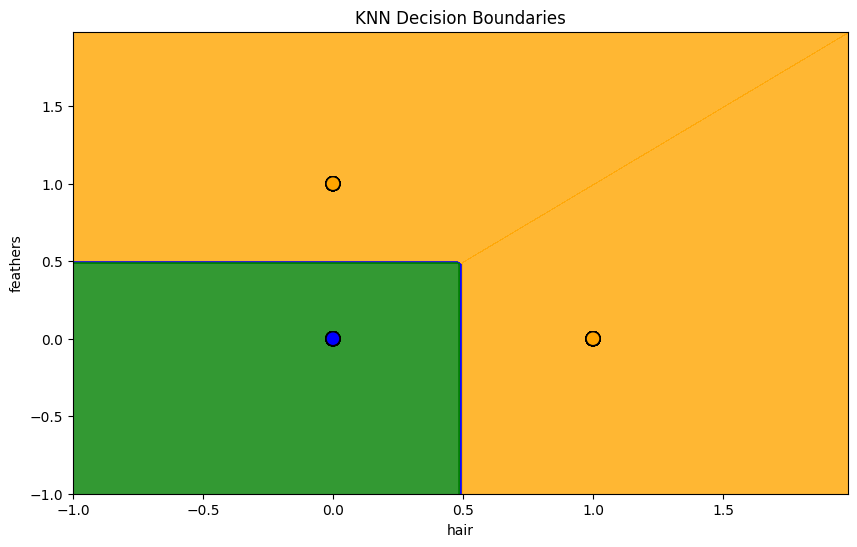

In [42]:
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'X_train' is your training data DataFrame and 'y_train' are the labels
# Select two features for visualization (e.g., features at index 0 and 1)
X_train_2d = X_train.iloc[:, [0, 1]]  # Select the first two features

# Create a meshgrid for the selected features
h = 0.02  # Step size in the mesh
x_min, x_max = X_train_2d.iloc[:, 0].min() - 1, X_train_2d.iloc[:, 0].max() + 1
y_min, y_max = X_train_2d.iloc[:, 1].min() - 1, X_train_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train the KNN classifier using the selected features
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_2d, y_train)

# Predict the classification for each point in the meshgrid
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and training points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(('orange', 'blue', 'green')), alpha=0.8)
plt.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, edgecolors='k', s=100, cmap=ListedColormap(('orange', 'blue', 'green')))
plt.title('KNN Decision Boundaries (2 Features)')
plt.xlabel('hair')
plt.ylabel('feathers')
plt.title('KNN Decision Boundaries')
plt.show()

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 18}
Best F1 Score: 0.6342605311355312


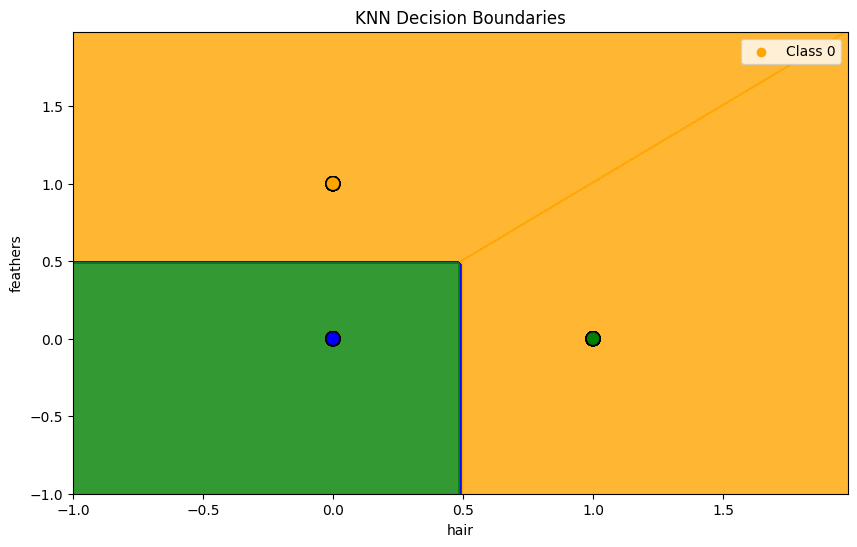

In [43]:
X = df[['hair', 'feathers']].astype(float)  # ensure numeric types
y = df.iloc[:, -1]
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(X))
X_clean = X[(z_scores < 3).all(axis=1)]
y_clean = y[(z_scores < 3).all(axis=1)]

# Split the data into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier on the selected two features
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_weighted')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

# Train the best model
knn_model = grid.best_estimator_
knn_model.fit(X_train, y_train)


# Create a meshgrid for plotting decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the classification for each point in the meshgrid
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and training points
from matplotlib.colors import ListedColormap
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(('orange', 'blue', 'green')), alpha=0.8)

# Plot training points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', s=100, cmap=ListedColormap(('orange', 'blue', 'green')))
plt.title('KNN Decision Boundaries')
plt.xlabel('hair')
plt.ylabel('feathers')
plt.legend(handles=plt.scatter([], [], color='orange', label='Class 0').legend_elements()[0], labels=list(set(y_train)))
plt.show()

In [44]:
# Use the best model from GridSearch
best_knn = grid.best_estimator_

# Predict and evaluate
y_pred = best_knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.85      0.92      0.88        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.33      1.00      0.50         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.71        21
   macro avg       0.36      0.49      0.40        21
weighted avg       0.61      0.71      0.65        21

Confusion Matrix:
 [[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 2  0  0  1  0  0]
 [ 0  0  0  1  0  0]]


Interview Questions

1. What are the key hyperparameters in KNN?
ANS-n_neighbors (k): Number of neighbors.
weights: Voting mechanism.
metric: Distance calculation method.
p: Power parameter for Minkowski distance.
algorithm: Algorithm for searching nearest neighbors.
leaf_size: Affects tree-based search performance.
    
2. What distance metrics can be used in KNN?
ANS-Euclidean: General-purpose distance for continuous data.
Manhattan: Ideal for high-dimensional or grid-like data.
Minkowski: A generalization of Euclidean and Manhattan distances.
Cosine: Useful for high-dimensional, sparse data.
Hamming: Best for categorical or binary data.
Mahalanobis: Accounts for correlation between variables.